이것은 [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff) 책의 노트북이다. 가독성을 위해 실행 가능한 코드 블록과 섹션 제목만 포함하고 책의 다른 모든 텍스트 단락, 그림 및 의사 코드는 생략한다.

**무슨 일이 일어나고 있는지 확인하고 싶다면 책과 함께 노트북을 사용하는 것을 권장한다.**

이 노트북은 TensorFlow 2.6 기반이다. (옮긴이: 버전 2.10.0, 애플 실리콘 M1 으로 테스트)

# 컴퓨터 비전(computer vision)을 위한 딥 러닝 소개

## 합성곱 신경망 (ConvNet, Convolutional Neural Network) 소개

**작은 합성곱 신경망 인스턴스화**

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

Metal device set to: Apple M1 Pro


2022-11-16 11:04:43.840113: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-16 11:04:43.840274: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


**모델 요약 표시**

In [3]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

**MNIST 이미지에 합성곱 신경망 훈련**

In [4]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5


2022-11-16 11:04:49.419919: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-16 11:04:49.682169: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - 11s 11ms/step - loss: 0.1557 - accuracy: 0.9526
Epoch 2/5
938/938 [==============================] - 10s 11ms/step - loss: 0.0433 - accuracy: 0.9869
Epoch 3/5
938/938 [==============================] - 10s 11ms/step - loss: 0.0300 - accuracy: 0.9907
Epoch 4/5
938/938 [==============================] - 10s 11ms/step - loss: 0.0235 - accuracy: 0.9927
Epoch 5/5
938/938 [==============================] - 10s 11ms/step - loss: 0.0171 - accuracy: 0.9949


**합성곱 신경망 평가**

In [5]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

 21/313 [=>............................] - ETA: 1s - loss: 0.0212 - accuracy: 0.9926   

2022-11-16 11:05:44.890153: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step - loss: 0.0249 - accuracy: 0.9920
Test accuracy: 0.992


### 합성곱  연산

#### 테두리 효과 및 패딩 이해

#### 합성곱 스트라이드 (stride) 이해

### 최대-폴링(max-pooling) 연산

**최대-폴링 층이 누락된 잘못된 구조의 커브넷**

In [6]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

In [7]:
model_no_max_pool.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 flatten_1 (Flatten)         (None, 61952)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                619530    
                                                                 
Total params: 712,202
Trainable params: 712,202
Non-trainab

## 작은 데이터셋으로 도면에서 합성곱 신경망 훈련

### 작은-데이터에 대한 딥러닝과 관련된 문제

### 데이터 다운로드

**훈련, 검증 및 테스트 디렉토리로 이미지 복사**

In [8]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

In [9]:
def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir, exist_ok=True) # 옮긴이: 이미 존재할 경우, 처리하기 위해 exist_ok=True 매개변수 추가
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

### 모델 구축

**개 vs. 고양이 분류에 대한 작은 합성곱 신경망 인스턴스화**

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [11]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

**훈련을 위해 모델 구성**

In [12]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

### 데이터 전처리

**이미지를 읽기 위해 `image_dataset_from_directory` 사용**

In [13]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [14]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [15]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [16]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [17]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


**`Dataset`에 의해 산출된 데이터와 레이블의 형태 보여주기**

In [18]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**`Dataset`을 사용하여 모델 적응**

In [19]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30


2022-11-16 11:06:06.779980: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - ETA: 0s - loss: 0.7328 - accuracy: 0.4980

2022-11-16 11:06:10.885126: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 5s 73ms/step - loss: 0.7328 - accuracy: 0.4980 - val_loss: 0.6927 - val_accuracy: 0.5140
Epoch 2/30
63/63 [==============================] - 4s 67ms/step - loss: 0.6925 - accuracy: 0.5660 - val_loss: 0.6682 - val_accuracy: 0.5670
Epoch 3/30
63/63 [==============================] - 4s 67ms/step - loss: 0.6671 - accuracy: 0.6000 - val_loss: 0.6240 - val_accuracy: 0.6430
Epoch 4/30
63/63 [==============================] - 4s 67ms/step - loss: 0.6244 - accuracy: 0.6625 - val_loss: 0.6088 - val_accuracy: 0.6650
Epoch 5/30
63/63 [==============================] - 4s 67ms/step - loss: 0.5729 - accuracy: 0.7040 - val_loss: 0.6848 - val_accuracy: 0.6390
Epoch 6/30
63/63 [==============================] - 4s 67ms/step - loss: 0.5444 - accuracy: 0.7275 - val_loss: 0.5745 - val_accuracy: 0.7090
Epoch 7/30
63/63 [==============================] - 4s 68ms/step - loss: 0.4962 - accuracy: 0.7555 - val_loss: 0.5445 - val_accuracy: 0.7290
Epoch 8/30
63/63 [======

**훈련 동안 손실 및 정확도 곡선 표시**

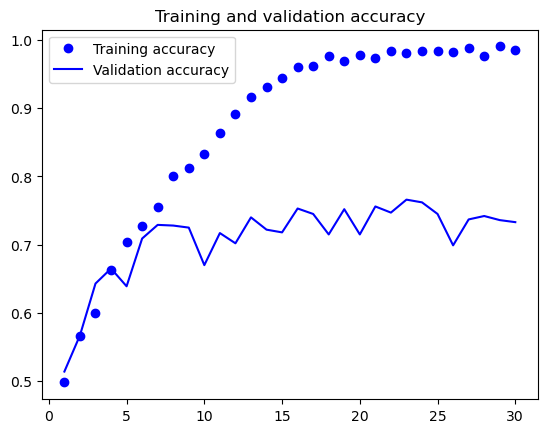

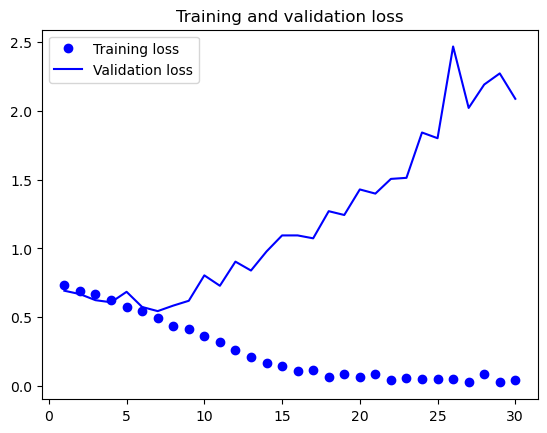

In [20]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**테스트셋에서 모델 평가**

In [21]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

 1/63 [..............................] - ETA: 13s - loss: 0.3925 - accuracy: 0.7500

2022-11-16 11:08:28.010566: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 2s 22ms/step - loss: 0.5701 - accuracy: 0.7185
Test accuracy: 0.719


###  데이터 증가 (augmentation) 사용

**이미지 모델에 데이터 증가 단계 정의**

In [22]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**약간의 무작위 증가된 훈련 이미지 표시**

2022-11-16 11:08:47.509787: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2022-11-16 11:08:48.137904: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2022-11-16 11:08:48.783022: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2022-11-16 11:08:49.324376: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2022-11-16 11:08:50.059423: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2022-11-16 11:08:50.595856: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2022-11-16 11:08:51.242806: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2022-11-16 11:08:51.788187: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2022-11-16 11:08:52.508309: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2022-11-16 11:08:53.067680: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2022-11-16 11:08:53.811437: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2022-11-16 11:08:54.539824: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2022-11-16 11:08:55.288034: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2022-11-16 11:08:55.890150: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2022-11-16 11:08:56.654491: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2022-11-16 11:08:57.400730: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2022-11-16 11:08:58.152661: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2022-11-16 11:08:58.790478: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


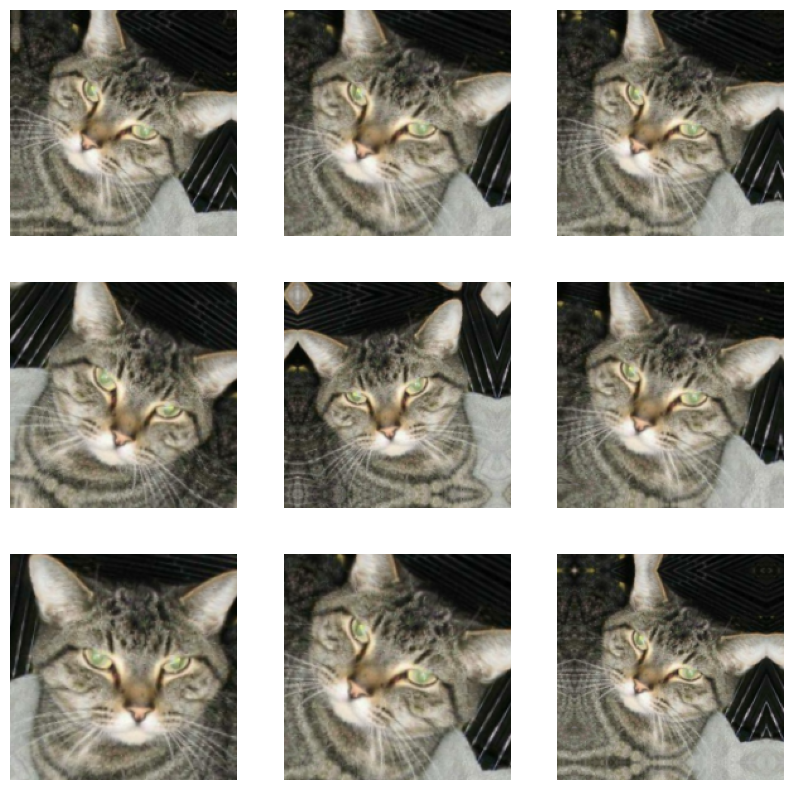

In [23]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**이미지 증가(augmentaion) 및 드롭아웃(dropout) 포함된 새로운 합성곱 신경망 정의**

In [24]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**규제된 합성곱 신경망 훈련**

In [25]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=5, # 100 -> 현재 처리 속도가 늦다.
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/5


2022-11-16 11:09:21.552345: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - ETA: 0s - loss: 0.7002 - accuracy: 0.5055

2022-11-16 11:09:43.174622: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 24s 338ms/step - loss: 0.7002 - accuracy: 0.5055 - val_loss: 0.6876 - val_accuracy: 0.5000
Epoch 2/5
63/63 [==============================] - 20s 320ms/step - loss: 0.6901 - accuracy: 0.5400 - val_loss: 0.6749 - val_accuracy: 0.6100
Epoch 3/5
63/63 [==============================] - 20s 322ms/step - loss: 0.7044 - accuracy: 0.5790 - val_loss: 0.6608 - val_accuracy: 0.6030
Epoch 4/5
63/63 [==============================] - 21s 327ms/step - loss: 0.6682 - accuracy: 0.6265 - val_loss: 0.7124 - val_accuracy: 0.5700
Epoch 5/5
63/63 [==============================] - 20s 322ms/step - loss: 0.6276 - accuracy: 0.6685 - val_loss: 0.6295 - val_accuracy: 0.6380


**테스트셋에서 모델 평가**

In [26]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

 1/63 [..............................] - ETA: 13s - loss: 0.5200 - accuracy: 0.6562

2022-11-16 11:11:09.175237: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 2s 22ms/step - loss: 0.6211 - accuracy: 0.6585
Test accuracy: 0.659


## 사전 훈련된 모델 잇점¶

### 사전 훈련된 모델로 특성 추출

**VGG16 합성곱 기반 인스턴스화**

In [27]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [28]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

#### 데이터 증가 없이 특성 추출

**VGG16 특성과 연관된 레이블 추출**

In [30]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 12ms/step


In [31]:
train_features.shape

(2000, 5, 5, 512)

**밀집하여 연결된 분류기 정의와 훈련**

In [33]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20


2022-11-16 11:25:50.982808: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - ETA: 0s - loss: 13.8402 - accuracy: 0.9295

2022-11-16 11:25:52.100777: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 2s 19ms/step - loss: 13.8402 - accuracy: 0.9295 - val_loss: 2.9434 - val_accuracy: 0.9740
Epoch 2/20
63/63 [==============================] - 1s 12ms/step - loss: 4.3579 - accuracy: 0.9760 - val_loss: 3.9222 - val_accuracy: 0.9730
Epoch 3/20
63/63 [==============================] - 1s 12ms/step - loss: 2.6783 - accuracy: 0.9820 - val_loss: 4.1966 - val_accuracy: 0.9770
Epoch 4/20
63/63 [==============================] - 1s 12ms/step - loss: 1.3535 - accuracy: 0.9885 - val_loss: 3.5999 - val_accuracy: 0.9750
Epoch 5/20
63/63 [==============================] - 1s 13ms/step - loss: 0.8445 - accuracy: 0.9945 - val_loss: 3.9883 - val_accuracy: 0.9740
Epoch 6/20
63/63 [==============================] - 1s 11ms/step - loss: 1.0302 - accuracy: 0.9890 - val_loss: 4.0456 - val_accuracy: 0.9800
Epoch 7/20
63/63 [==============================] - 1s 12ms/step - loss: 0.2522 - accuracy: 0.9955 - val_loss: 7.1662 - val_accuracy: 0.9680
Epoch 8/20
63/63 [=====

**Plotting the results**

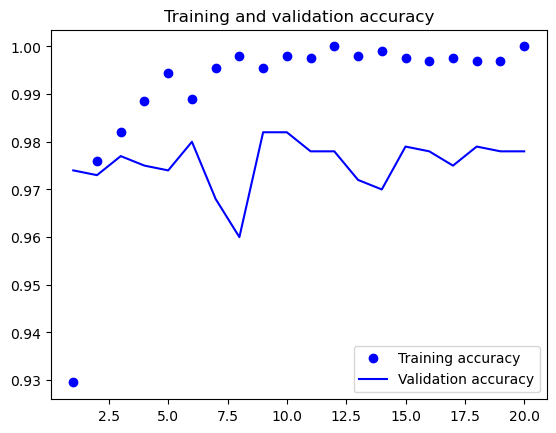

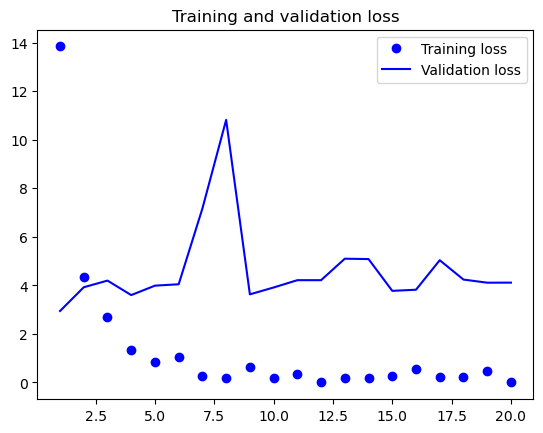

In [34]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#### 데이터 증가와 같이 특성 추출

**VGG16 합성곱 기반 인스턴스화 및 동결**

In [35]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

**동결 전후 훈련 가능 가중치 목록 출력**

In [36]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [37]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**합성곱 기반에 데이터 중가 단계 및 분류기 추기**

In [38]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [39]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=5, # 50 -> 처리 속도가 늦다
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/5


2022-11-16 15:35:34.848170: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - ETA: 0s - loss: 21.2640 - accuracy: 0.8990

2022-11-16 15:36:02.719902: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 35s 509ms/step - loss: 21.2640 - accuracy: 0.8990 - val_loss: 4.9331 - val_accuracy: 0.9620
Epoch 2/5
63/63 [==============================] - 30s 484ms/step - loss: 7.2087 - accuracy: 0.9435 - val_loss: 19.7977 - val_accuracy: 0.9160
Epoch 3/5
63/63 [==============================] - 31s 499ms/step - loss: 5.0256 - accuracy: 0.9595 - val_loss: 6.5514 - val_accuracy: 0.9610
Epoch 4/5
63/63 [==============================] - 31s 487ms/step - loss: 4.7360 - accuracy: 0.9615 - val_loss: 2.7811 - val_accuracy: 0.9790
Epoch 5/5
63/63 [==============================] - 31s 485ms/step - loss: 2.8010 - accuracy: 0.9715 - val_loss: 3.5667 - val_accuracy: 0.9780


**테스트셋에서 모델 평가**

In [40]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

2022-11-16 15:44:18.711184: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 10s 155ms/step - loss: 3.6216 - accuracy: 0.9730
Test accuracy: 0.973


### 사전 훈련된 모델의 미세-조정

In [41]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

**마지막에서 네 번째까지 모든 레이어 고정**

In [42]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

**모델 세부-조정**

In [45]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=5, # 30 처리 속도가 늦다
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/5


2022-11-16 15:50:32.239542: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - ETA: 0s - loss: 0.5040 - accuracy: 0.9870

2022-11-16 15:51:03.351702: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 38s 559ms/step - loss: 0.5040 - accuracy: 0.9870 - val_loss: 2.3944 - val_accuracy: 0.9730
Epoch 2/5
63/63 [==============================] - 33s 526ms/step - loss: 0.5192 - accuracy: 0.9870 - val_loss: 1.9293 - val_accuracy: 0.9780
Epoch 3/5
63/63 [==============================] - 33s 522ms/step - loss: 0.3256 - accuracy: 0.9920 - val_loss: 2.0331 - val_accuracy: 0.9790
Epoch 4/5
63/63 [==============================] - 33s 523ms/step - loss: 0.3755 - accuracy: 0.9905 - val_loss: 2.0574 - val_accuracy: 0.9790
Epoch 5/5
63/63 [==============================] - 33s 524ms/step - loss: 0.3027 - accuracy: 0.9910 - val_loss: 2.0894 - val_accuracy: 0.9810


In [44]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

2022-11-16 15:50:01.315464: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 10s 156ms/step - loss: 2.2663 - accuracy: 0.9760
Test accuracy: 0.976


## 요약